O projeto consiste em pegar dados sobre a COVID-19 no Brasil através de uma API pública, e construir gráficos a partir deles.

Primeiramente, fazemos o request dos dados através da API e o guardamos.

In [36]:
import requests as req

In [37]:
url = "https://api.covid19api.com/dayone/country/brazil"
resp = req.get(url)

print(resp.status_code)
raw_data = resp.json()

200


Checando o formato do conteúdo:

In [39]:
raw_data[0]

{'Active': 1,
 'City': '',
 'CityCode': '',
 'Confirmed': 1,
 'Country': 'Brazil',
 'CountryCode': 'BR',
 'Date': '2020-02-26T00:00:00Z',
 'Deaths': 0,
 'ID': '63aa488e-b4a2-4fcd-ae15-07c1ff219903',
 'Lat': '-14.24',
 'Lon': '-51.93',
 'Province': '',
 'Recovered': 0}

Em resumo, esta API retorna um "relatório" de dados por dia da pandemia no país, começando no dia do priemiro caso confirmado. Os dados que queremos aqui são os casos confirmados (chave "Confirmed"), mortes (chave "Deaths"), recuperados (chave "Recovered"), casos ativos (chave "Active") e a data de coleta destes dados (chave "Date").

Agora vamos filtrar, por dia, os dados que não queremos.

In [40]:
final_data = []
for day in raw_data:
    final_data.append([day['Confirmed'], day['Deaths'], day['Recovered'], day['Active'], day['Date']])

Checando os dados finais:

In [41]:
final_data

[[1, 0, 0, 1, '2020-02-26T00:00:00Z'],
 [1, 0, 0, 1, '2020-02-27T00:00:00Z'],
 [1, 0, 0, 1, '2020-02-28T00:00:00Z'],
 [2, 0, 0, 2, '2020-02-29T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-01T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-02T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-03T00:00:00Z'],
 [4, 0, 0, 4, '2020-03-04T00:00:00Z'],
 [4, 0, 0, 4, '2020-03-05T00:00:00Z'],
 [13, 0, 0, 13, '2020-03-06T00:00:00Z'],
 [13, 0, 0, 13, '2020-03-07T00:00:00Z'],
 [20, 0, 0, 20, '2020-03-08T00:00:00Z'],
 [25, 0, 0, 25, '2020-03-09T00:00:00Z'],
 [31, 0, 0, 31, '2020-03-10T00:00:00Z'],
 [38, 0, 0, 38, '2020-03-11T00:00:00Z'],
 [52, 0, 0, 52, '2020-03-12T00:00:00Z'],
 [151, 0, 0, 151, '2020-03-13T00:00:00Z'],
 [151, 0, 0, 151, '2020-03-14T00:00:00Z'],
 [162, 0, 0, 162, '2020-03-15T00:00:00Z'],
 [200, 0, 1, 199, '2020-03-16T00:00:00Z'],
 [321, 1, 2, 318, '2020-03-17T00:00:00Z'],
 [372, 3, 2, 367, '2020-03-18T00:00:00Z'],
 [621, 6, 2, 613, '2020-03-19T00:00:00Z'],
 [793, 11, 2, 780, '2020-03-20T00:00:00Z'],
 [1021, 15, 2, 10

Se vamos guardar estes dados num CSV para criarmos um gráfico, falta criarmos um header para os campos.

In [42]:
final_data.insert(0, ['Confirmados','Mortes','Recuperados','Ativos','Data'])
final_data

[['Confirmados', 'Mortes', 'Recuperados', 'Ativos', 'Data'],
 [1, 0, 0, 1, '2020-02-26T00:00:00Z'],
 [1, 0, 0, 1, '2020-02-27T00:00:00Z'],
 [1, 0, 0, 1, '2020-02-28T00:00:00Z'],
 [2, 0, 0, 2, '2020-02-29T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-01T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-02T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-03T00:00:00Z'],
 [4, 0, 0, 4, '2020-03-04T00:00:00Z'],
 [4, 0, 0, 4, '2020-03-05T00:00:00Z'],
 [13, 0, 0, 13, '2020-03-06T00:00:00Z'],
 [13, 0, 0, 13, '2020-03-07T00:00:00Z'],
 [20, 0, 0, 20, '2020-03-08T00:00:00Z'],
 [25, 0, 0, 25, '2020-03-09T00:00:00Z'],
 [31, 0, 0, 31, '2020-03-10T00:00:00Z'],
 [38, 0, 0, 38, '2020-03-11T00:00:00Z'],
 [52, 0, 0, 52, '2020-03-12T00:00:00Z'],
 [151, 0, 0, 151, '2020-03-13T00:00:00Z'],
 [151, 0, 0, 151, '2020-03-14T00:00:00Z'],
 [162, 0, 0, 162, '2020-03-15T00:00:00Z'],
 [200, 0, 1, 199, '2020-03-16T00:00:00Z'],
 [321, 1, 2, 318, '2020-03-17T00:00:00Z'],
 [372, 3, 2, 367, '2020-03-18T00:00:00Z'],
 [621, 6, 2, 613, '2020-03-19T00:00:00Z'],


Agora, precisamos tratar o campo das datas, porque ela está em um formato não apropriado, pois o atual tem como objetivo explicitar o fuso horário.

In [43]:
# O trecho a seguir serve para podermos refernciar os campos da lista de forma mais intuitiva
# em relação ao dado que ele representa

CONFIRMADOS = 0
MORTES = 1
RECUPERADOS = 2
ATIVOS = 3
DATA = 4

# Não adianta fazer algo como "for day in final_data:",
# pois a lista "day" é só uma cópia temporária, e não altera final_data
for i in range(1, len(final_data)):
    # Escrevemos a data até o caractere de índice 9
    final_data[i][DATA] = final_data[i][DATA][:10]

In [44]:
final_data

[['Confirmados', 'Mortes', 'Recuperados', 'Ativos', 'Data'],
 [1, 0, 0, 1, '2020-02-26'],
 [1, 0, 0, 1, '2020-02-27'],
 [1, 0, 0, 1, '2020-02-28'],
 [2, 0, 0, 2, '2020-02-29'],
 [2, 0, 0, 2, '2020-03-01'],
 [2, 0, 0, 2, '2020-03-02'],
 [2, 0, 0, 2, '2020-03-03'],
 [4, 0, 0, 4, '2020-03-04'],
 [4, 0, 0, 4, '2020-03-05'],
 [13, 0, 0, 13, '2020-03-06'],
 [13, 0, 0, 13, '2020-03-07'],
 [20, 0, 0, 20, '2020-03-08'],
 [25, 0, 0, 25, '2020-03-09'],
 [31, 0, 0, 31, '2020-03-10'],
 [38, 0, 0, 38, '2020-03-11'],
 [52, 0, 0, 52, '2020-03-12'],
 [151, 0, 0, 151, '2020-03-13'],
 [151, 0, 0, 151, '2020-03-14'],
 [162, 0, 0, 162, '2020-03-15'],
 [200, 0, 1, 199, '2020-03-16'],
 [321, 1, 2, 318, '2020-03-17'],
 [372, 3, 2, 367, '2020-03-18'],
 [621, 6, 2, 613, '2020-03-19'],
 [793, 11, 2, 780, '2020-03-20'],
 [1021, 15, 2, 1004, '2020-03-21'],
 [1546, 25, 2, 1519, '2020-03-22'],
 [1924, 34, 2, 1888, '2020-03-23'],
 [2247, 46, 2, 2199, '2020-03-24'],
 [2554, 59, 2, 2493, '2020-03-25'],
 [2985, 77, 6, 2

Agora os dados estão bem melhor formatados, mas a nova data ainda não serve, pois ainda é só uma string que representa uma data. Vamos transformá-los em datas de verdade usando a biblioteca Datetime (é d ainstalação padrão do Python).

Primeramente, então, vamos criar o arquivo CSV que vamos usar.

In [45]:
import datetime as dt
import csv

In [46]:
with open('brasil-covid.csv', 'w', encoding = 'utf-8', newline = '') as file:
    writer = csv.writer(file)
    writer.writerows(final_data)

Agora, vamos realizar a conversão de String para Datetime:

In [47]:
for i in range(1, len(final_data)):
    final_data[i][DATA] = dt.datetime.strptime(final_data[i][DATA], "%Y-%m-%d")

In [48]:
final_data

[['Confirmados', 'Mortes', 'Recuperados', 'Ativos', 'Data'],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 26, 0, 0)],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 27, 0, 0)],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 28, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 2, 29, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 1, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 2, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 3, 0, 0)],
 [4, 0, 0, 4, datetime.datetime(2020, 3, 4, 0, 0)],
 [4, 0, 0, 4, datetime.datetime(2020, 3, 5, 0, 0)],
 [13, 0, 0, 13, datetime.datetime(2020, 3, 6, 0, 0)],
 [13, 0, 0, 13, datetime.datetime(2020, 3, 7, 0, 0)],
 [20, 0, 0, 20, datetime.datetime(2020, 3, 8, 0, 0)],
 [25, 0, 0, 25, datetime.datetime(2020, 3, 9, 0, 0)],
 [31, 0, 0, 31, datetime.datetime(2020, 3, 10, 0, 0)],
 [38, 0, 0, 38, datetime.datetime(2020, 3, 11, 0, 0)],
 [52, 0, 0, 52, datetime.datetime(2020, 3, 12, 0, 0)],
 [151, 0, 0, 151, datetime.datetime(2020, 3, 13, 0, 0)],
 [151, 0, 0, 151, datetime.da

## API Gráfica: QuickChart.io

Vamos usar uma das chamadas mais simples desta API para gerarmos nosso gráfico. Ela é baseada em uma biblioteca em JS, o que significa que sua organização é em estilo JSON. O QuickChart tem como padrão algo do tipo

```javascript
{
  type: 'bar',                                // Show a bar chart
  data: {
    labels: [2012, 2013, 2014, 2015, 2016],   // Set X-axis labels
    datasets: [{
      label: 'Users',                         // Create the 'Users' dataset
      data: [120, 60, 50, 180, 120]           // Add data to the chart
    }]
  }
}
```

que, em Python, se traduz para algo muito semelhante:

```python
{
  'type': 'bar',                                # Show a bar chart
  'data': {
    'labels': [2012, 2013, 2014, 2015, 2016],   # Set X-axis labels
    'datasets': [{
      'label': 'Users',                         # Create the 'Users' dataset
      'data': [120, 60, 50, 180, 120]           # Add data to the chart
    }]
  }
}
```

No final das contas, o gráfico gerado é algo como

![graph](https://quickchart.io/chart?c={type:%27bar%27,data:{labels:[2012,2013,2014,2015,2016],datasets:[{label:%27Users%27,data:[120,60,50,180,120]}]}})

Vamos criar algumas funções para facilitar nossa interação com a API gráfica. A primeira delas, ```get_datasets()```, será responsável pela chave "datasets" da resposta da API, que constrói nossos dados no eixo Y.

Assim, como parâmetro, vamos receber os dados reais de Y, e uma lista que contém os labels de cada um desses dados. Para os valores de Y, se a sua primeira posição for uma lista, será inicializada uma variável de nome ```datasets```, que é uma lista contendo ambos os valores de Y e seus labels respectivos, cada par em forma de dicionário.

Caso contrário, retornamos um único dicionário, com o label sendo a lista de labels no 1a posição e o dado, a lista de valores de y no mesmo caso.

In [49]:
def get_datasets(y, labels):
    if type(y[0]) == list:
        datasets = []
        for i in range(len(y)):
            datasets.append({
                'label' : labels[i],
                'data' : y[i]
            })
        return datasets
    else:
        return {
            'label' : labels[0],
            'data' : y
        }

Nossa próxima função, ```set_title```, define o título do gráfico, e só recebe como parâmetro o título.

In [50]:
def set_title(title = ''):
    if title != '':
        display = 'true'
    else:
        display = 'false'
    return {
        'title' : title,
        'display' : display
    }

Agora, vamos fazer a função que cria o dicionário que representa o gráfico:

In [60]:
def create_chart(x, y, labels, graph_type = 'bar', title = ''):
    datasets = get_datasets(y, labels)
    options = set_title(title)
    
    chart = {
        'type' : graph_type,
        'data' : {
            'labels' : x,
            'datasets' : datasets
        },
        'options' : options
    }
    
    return chart

Agora, precisamos da função que faz a requisição na API usando este dicionário. A chamada da API retorna o arquivo de imagem, então, para podermos utilizar e guardar a imagem com o projeto, vamos retornar com esta função o content (o conteúdo "raw", em binário) da requisição. Assim, também precisaremos de uma função para salvar a imagem recebida.

In [52]:
def get_API_chart(chart):
    base_url = 'https://quickchart.io/chart'
    resp = req.get(f'{base_url}?c={str(chart)}')
    return resp.content

In [61]:
def save_image(path, content):
    with open(path, 'wb') as image: # O modo "wb" significa escrita de conteúdo binário
        image.write(content)

Para ficar mais fácil de ver o que estamos fazendo, vamos criar uma função para mostrar a imagem dentro do Notebook do Jupyter.

In [54]:
from PIL import Image
from IPython.display import display

In [55]:
def display_image(path):
    img_pil = Image.open(path)
    display(img_pil)

Finalmente, acabamos as funções auxiliares. Vamos criar nossos dados e gerar o gráfico correspondente. Ele será um plot de barras, em grupos, mostrando a evolução dos números de casos de COVID-19, confirmados e recuperados.

Para melhor visualização, vamos usar os dados espaçados de 10 em 10 dias.

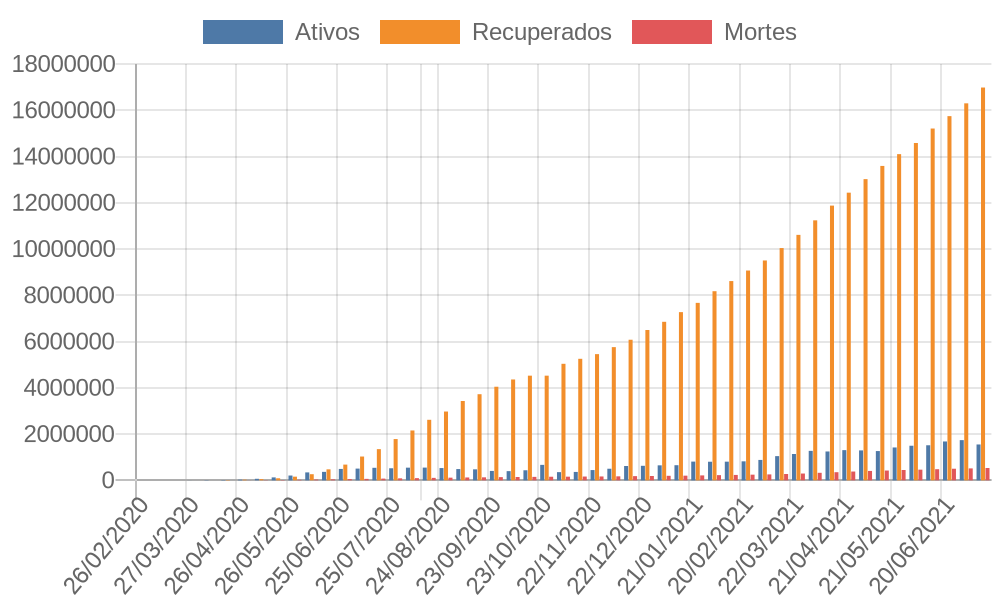

In [71]:
y_data_1 = []
y_data_2 = []
y_data_3 = []
x = []

for day in final_data[1::10]:
    y_data_1.append(day[ATIVOS])
    y_data_2.append(day[RECUPERADOS])
    y_data_3.append(day[MORTES])
    x.append(day[DATA].strftime('%d/%m/%Y'))

labels = ['Ativos', 'Recuperados', 'Mortes']

chart = create_chart(x, [y_data_1, y_data_2, y_data_3], labels, title = "Evolução de casos de COVID-19 no Brasil")
chart_content = get_API_chart(chart)
save_image('meu_1o_grafico.png', chart_content)
display_image('meu_1o_grafico.png')

A biblioteca QuickChart ainda permite criar um QR Code com link direto pro gráfico criado em Python, então vamos criar uma função para isso.

Como nossa URL pode vir a ficar bem complexa, faremos um parsing de nosso valor textual para um valor textual especial para URLs, usando a biblioteca URLlib.

In [74]:
from urllib.parse import quote

In [75]:
def get_API_QRcode(link):
    text = quote(link) # Parsing do link para URL
    base_url = 'https://quickchart.io/qr'
    resp = req.get(f'{base_url}?text={text}')
    return resp.content

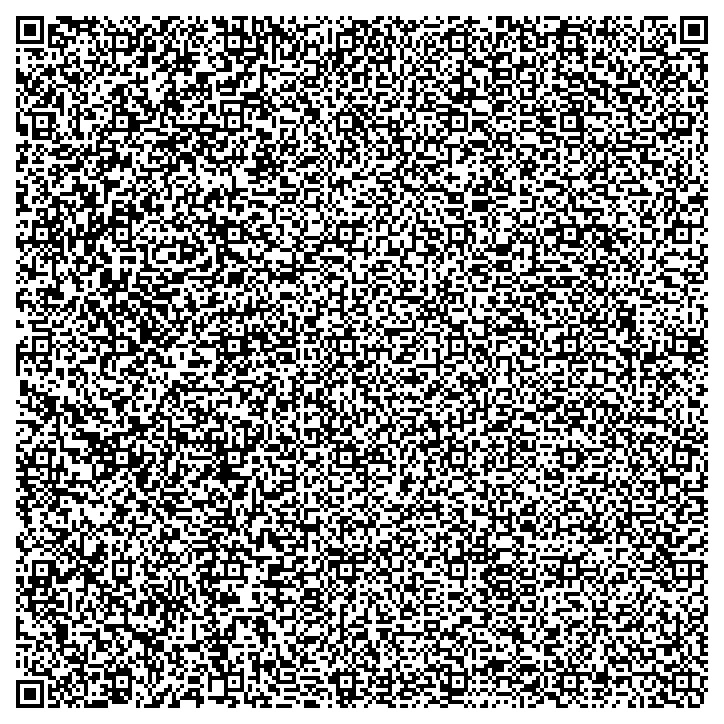

In [77]:
base_url = 'https://quickchart.io/chart'
link = f'{base_url}?c={str(chart)}'
save_image('qr_code.png', get_API_QRcode(link))
display_image('qr_code.png')